# Clustering Assignment

- Submitted by: Yubaraj Sahoo
- Date: 08/30/2020

## Problem Statement:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmers, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

**Objective: -**

- To categorise the countries using some socio-economic and health factors that determine the overall development of the country. 
- To recommend the top 5 countries in the direst need of aid, to the CEO.

**The steps are broadly:**
1. Reading & Understanding Data
2. Data Cleansing & Preparation
3. Data Visualization & Exploratory Data Analysis (EDA)
4. Outlier Treatment
5. Clustering
6. Cluster Profiling
7. Final Analysis and Conclusion

# Step 1: Reading & Understanding Data

Let us first import NumPy and Pandas and read the day dataset

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

In [3]:
country_df = pd.read_csv(r'/Users/yubrajsahoo/Desktop/upGrad/ClusteringAssignment/Country-data.csv')
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## 1.1 Inspect the various aspects of the dataframe

In [4]:
country_df.shape

(167, 10)

In [5]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


# Step 2: Data Cleansing & Preparation

## 2.1 Missing Value Analysis

#### Check any NULL values in data:

In [6]:
print(country_df.isnull().any())

country       False
child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool


**Observarion:** No null values present in the Data set.

## 2.2 Data Preparation

The exports, imports and health columns contain the percentage of gdpp value; hence we need to convert and get their accurate values.

In [7]:
country_df['exports'] = (country_df['gdpp'] * country_df['exports'])/100
country_df['health'] = (country_df['gdpp'] * country_df['health'])/100
country_df['imports'] = (country_df['gdpp'] * country_df['imports'])/100

In [8]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [9]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# Step 3: Data Visualization & Exploratory Data Analysis (EDA)

Let's now spend some time doing what is arguably the most important step - **understanding the data**.

We'll visualise our data using `matplotlib` and `seaborn`.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 3.1 Univariate analysis

We need to choose the countries that are in the direst need of aid. Hence, we need to identify those countries with using some socio-economic and health factors that determine the overall development of the country.

In [11]:
features = country_df.columns[1:]
features

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp'], dtype='object')

### 3.1.1 Distribution/Violin plot for Continuous / Numerical Variables

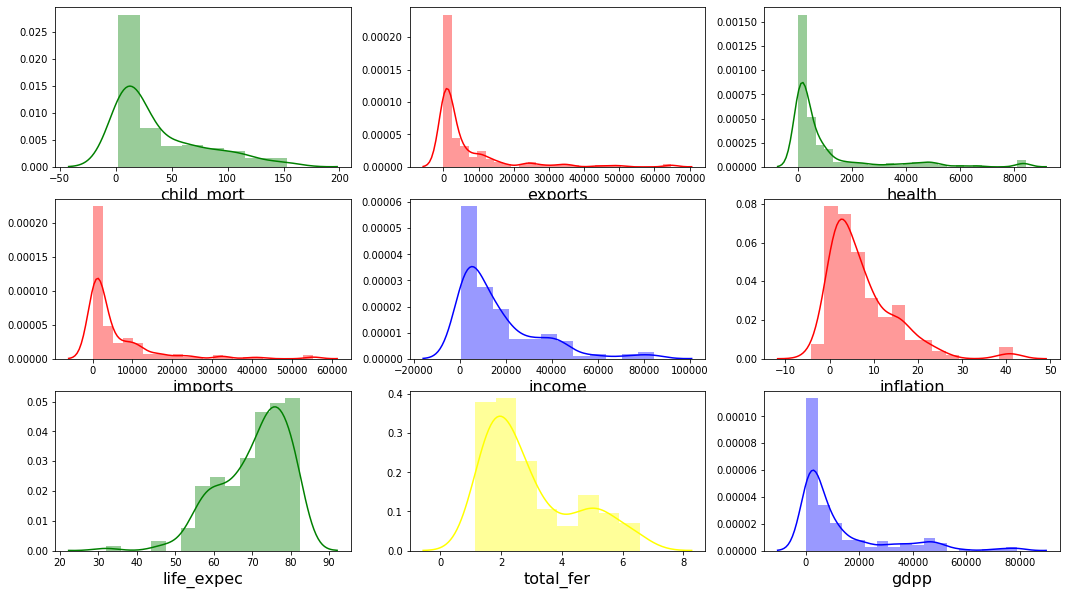

In [59]:
plt.figure(figsize = (18, 10))
plt.rcParams["axes.labelsize"] = 16
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.titlepad'] = 22
colr = {1:'green', 2:'red', 3:'green', 4:'red', 5:'blue', 6:'red', 7:'green', 8:'yellow', 9:'blue'}
index=1
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(country_df[i[1]],color=colr[index])
    #plt.tight_layout(pad=2.0)
    index=index+1

**Observation:**
- Child mortality rate distribution tendency towards the right skewed. The distribution has a peak from 0-20. The overall range of this category is from 0-250.
- Exports has a peak from 0-3,000 and the overall range is from 0-70,000.
- The Health distribution also tends towards the right skew and has a peak from 0-250. The overall range is up to 8,500.
- Imports look very much similar distribution to export and look normal distribution and pick at the centrally. The peak in this distribution if from 0-2500. The overall range is from 0-620000.
- The Income distribution looks, and the GDP variables has a long right tail, due to a few outliers present on the dataset. The peak in this distribution is from 0-5000, the overall range is from 0-100000.
- The inflation rate distribution has resemblance with import and export distribution, and it ranges from -11 to 49. The peak is from -1-2.
- Life Expectancy skewed to the left and some variable and suitable for cluster profiling. The peak is from 79-83, the overall range is from 23-92.
- Fertility Rate distribution skewed to the right and also some variation and is suitable for classification clustering. The peak is from 1.75-2.75, and the range is from 0-8.
- GDP has also skewed to the right and pick at centrally. The peak is from 0-4000, the overall range is from 0-90000.

Overall the distribution plot shows most variables are a tendency towards the right skewed except the life expectancy variable showed the tendency towards the left skewed. Skews indicate outliers are present in the dataset, we will further research this in the outlier section. There are clusters present in the following datasets -> Life_expec, total_fer, GDP, income, and inflation. As per specific direction we need to use child mortality, income and GDP variables which are suitable for cluster profiling.

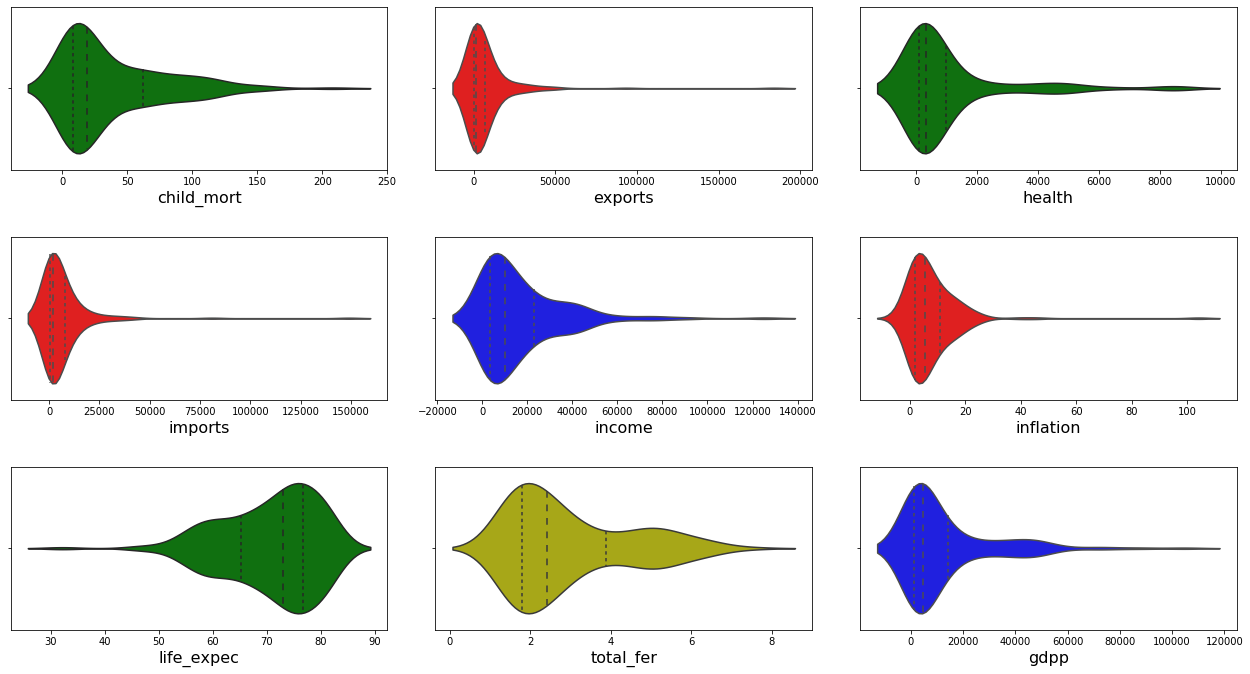

In [13]:
plt.figure(figsize = (18, 10))
colr = {1:'g', 2:'r', 3:'g', 4:'r', 5:'b', 6:'r', 7:'g', 8:'y', 9:'b'}
index=1
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.violinplot(data =country_df, x=i[1],inner="quartile",color=colr[index])
    plt.tight_layout(pad=3.0)
    index=index+1

**Observations:**
1. Child mortality rate has a median of 20. It also has a high density at 0-40 meaning most points lie there. 
2. Exports have a high density ranging from 1-8,000. The median is at 1,000.
3. Health has a median of 200 and a high-density region that ranges from 0-2000
4. Imports has a median of 6,500. And the high-density region ranges from 0-1,500.
5. Income has a median of 11,000. And a high density that ranges from 3,000-18,000.
6. Inflation’s high-density region ranges from 0-20. And the median is 6.
7. Life expectancy rate’s high-density region ranges from 65-82. And the median is 73.
8. Total_Fer has a median of 2.5 and a high-density region that ranges from 1.25-3.
9. GDP has a median of 4,000 and its high-density region ranges from 0-11,000.

**We need to choose the countries that are in the direst need of aid. Hence, we need to identify those countries with using some socio-economic and health factors that determine the overall development of the country.**

### 3.1.2 Top 10 countries having highest child_mort, total_fer, inflation and lowest exports, health, imports, income,life_expec & GDP

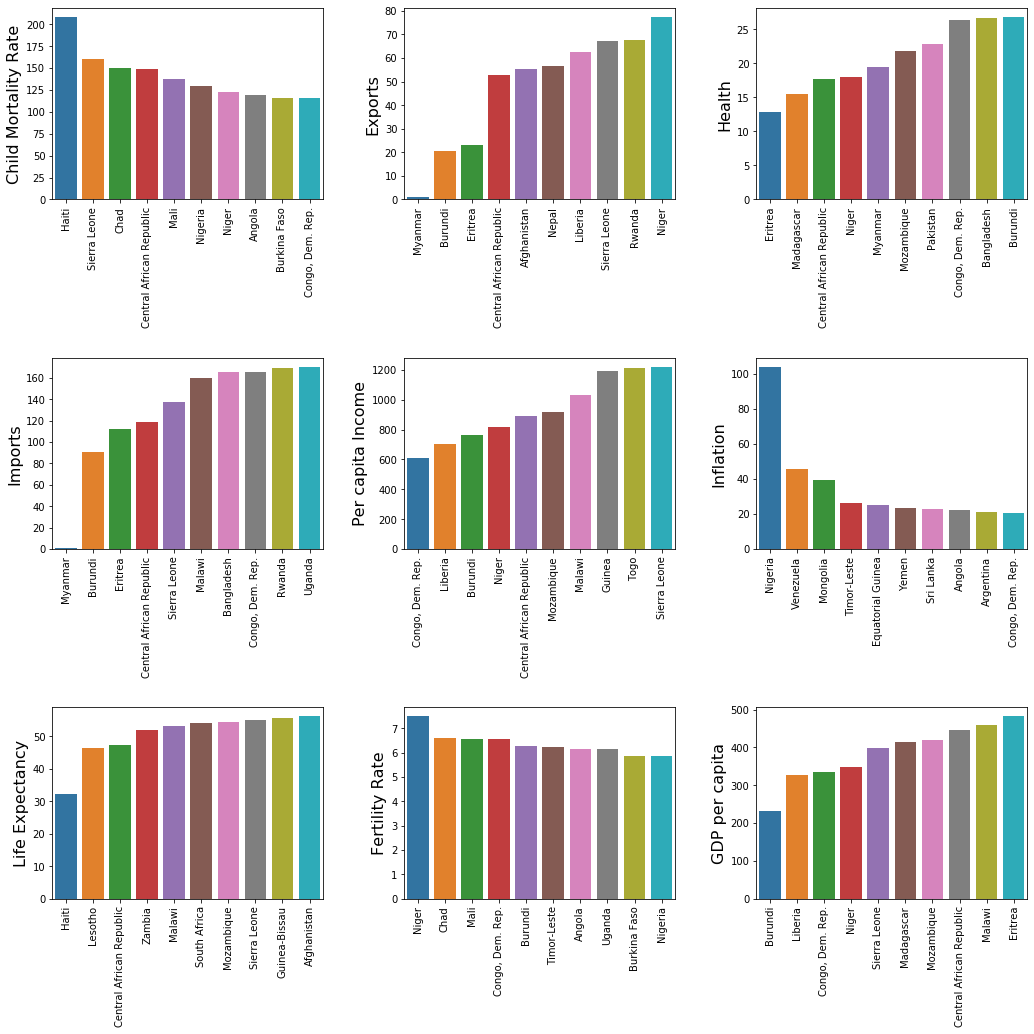

In [14]:
#Plot top 10 countries having highest Child Mortality Rate, Fertility Rate, Inflation
#and lowest Life Expectancy, Health, GDP per capita, Per capita Income, Exports, Imports.

fig = plt.figure(figsize=(15, 15))
index=1
y_axis = {1:'Child Mortality Rate', 2:'Exports',3:'Health',4:'Imports', 5:'Per capita Income', 6:'Inflation',
          7:'Life Expectancy',8:'Fertility Rate',9:'GDP per capita'}
for vals in features:
    ax = fig.add_subplot(3, 3, index)
    if vals in ['child_mort', 'total_fer', 'inflation']:
        df=country_df.sort_values(by=vals, ascending=False).head(10)
    else:
        df=country_df.sort_values(by=vals, ascending=True).head(10)
        
    ax=sns.barplot(x='country', y=vals, data= df)
    plt.xticks(rotation = 90)
    ax.set_xlabel('')
    ax.set_ylabel(y_axis.get(index))
    plt.tight_layout(pad=3.0)
    index= index+1

**Observation:**
1. The Haiti has the highest child mortality rate, Sierra Leone coming in 2nd and Chad with the 3rd highest.
2. The country Myanmar has the lowest exports; followed by Burundi has the second lowest and Eritrea is 3rd. 
3. The Eritrea lowest in health category, Madagascar and Niger coming in 2nd and 3rd.
4. Myanmar has the lowest imports; Burundi has the 2nd lowest and Eritrea with the third lowest, similarly to lowest Exports.
5. Congo, Dem. Rep. has the lowest income out of all the countries, Liberia and Burundi following in 2nd and 3rd. 
6. Nigeria has the highest inflation rate, Venezuela coming in 2nd and Mongolia at 3rd.
7. Lowest Life Expectancy: Haiti and Lesotho lowest and close behind the Central African Republic.
8. Highest Fertility Rate: Niger is highest this area, with 3 countries following close behind -> Chad, Mali, and Congo.
9. Lowest GDP: Burundi has the lowest GDP, Liberia following in 2nd and Congo, Dem. Rep. at 3rd.

Overall, the countries from African continents having high child mortality rate and inflation rate, low income and GDP

### 3.1.3 Top 10 countries having highest & lowest child mortality, Income & GDP

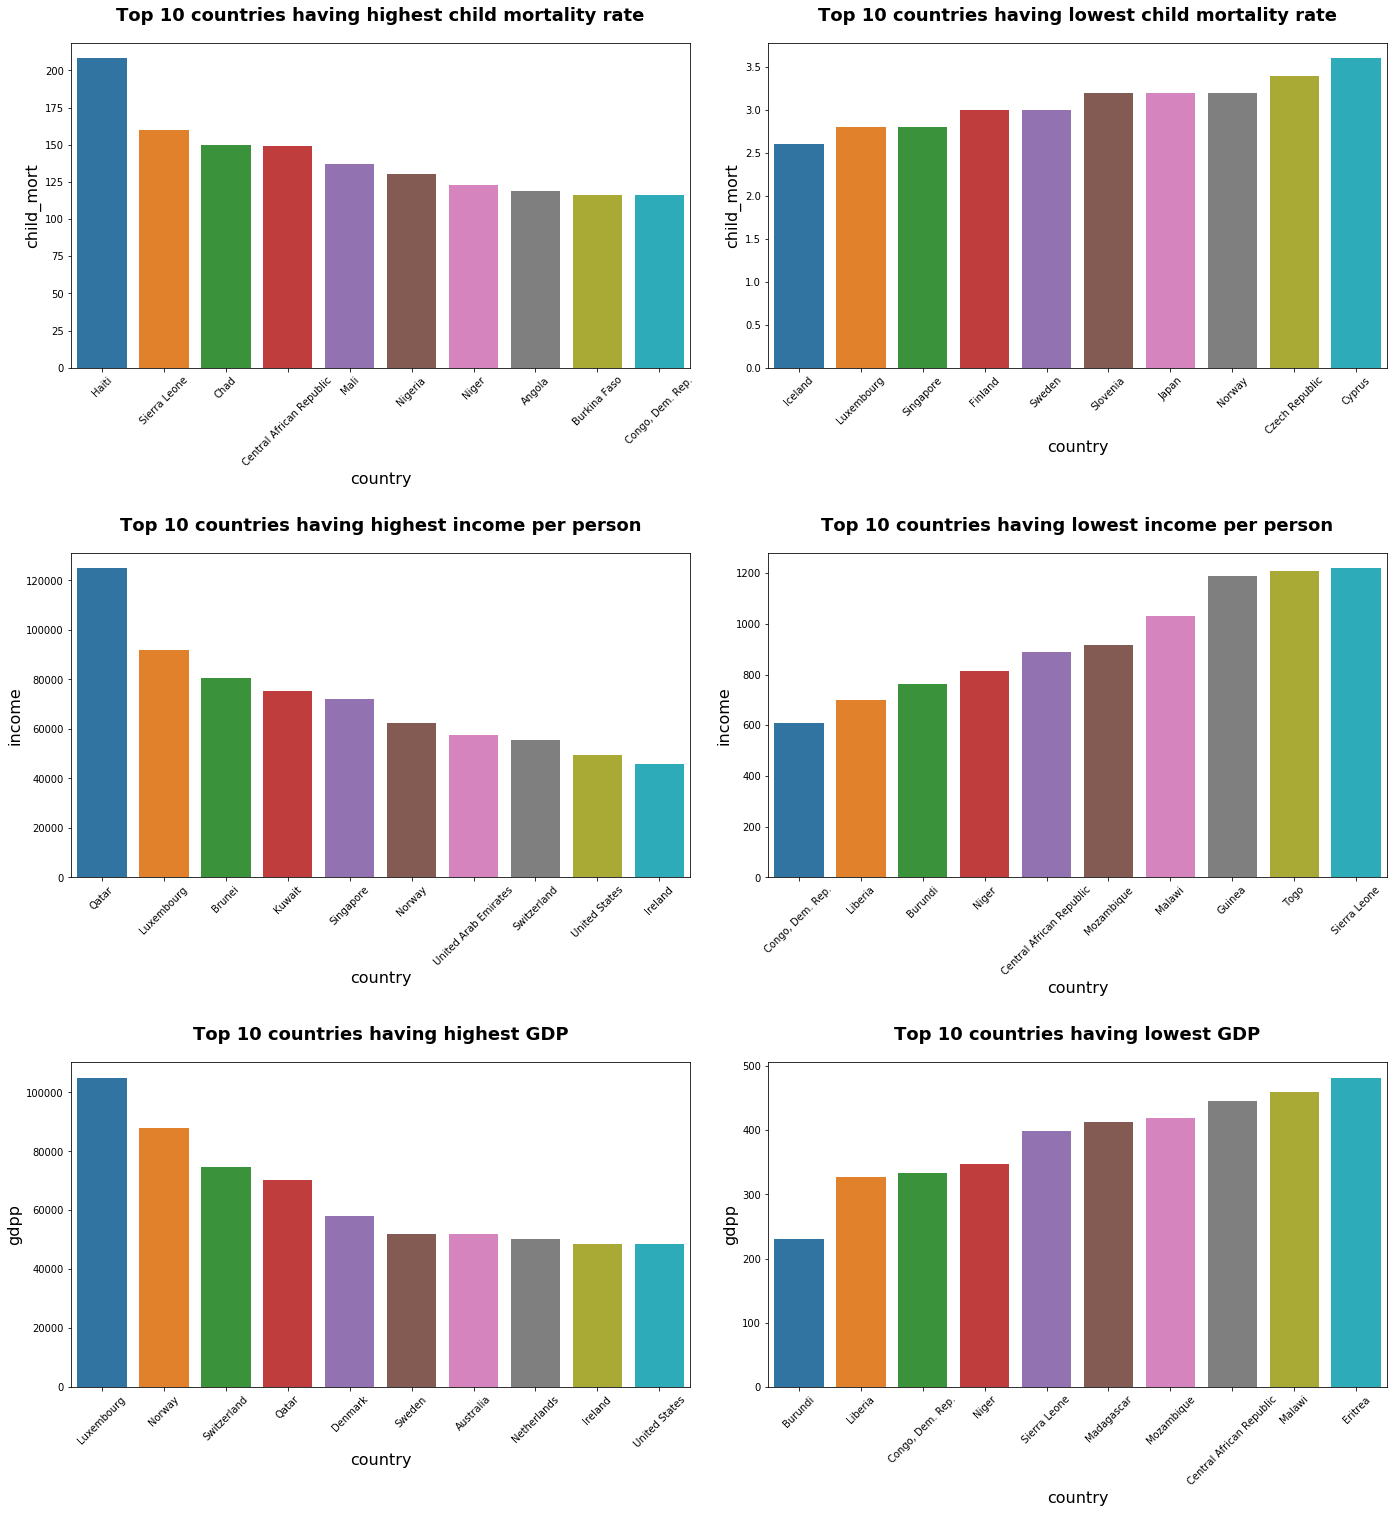

In [15]:
plt.figure(figsize=(20, 20))
plt.subplot(3,2,1)
df=country_df.sort_values(by='child_mort', ascending=False).head(10)
ax = sns.barplot(x='country', y='child_mort', hue=None, data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title('Top 10 countries having highest child mortality rate',weight='bold')

plt.subplot(3,2,2)
df=country_df.sort_values(by='child_mort', ascending=True).head(10)
ax = sns.barplot(x='country', y='child_mort', hue=None, data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title('Top 10 countries having lowest child mortality rate', weight='bold')

plt.tight_layout(pad=3.0)
plt.subplot(3,2,3)
df=country_df.sort_values(by='income', ascending=False).head(10)
ax = sns.barplot(x='country', y='income', hue=None, data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title('Top 10 countries having highest income per person', weight='bold')

plt.tight_layout(pad=3.0)
plt.subplot(3,2,4)
df=country_df.sort_values(by='income', ascending=True).head(10)
ax = sns.barplot(x='country', y='income', hue=None, data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title('Top 10 countries having lowest income per person', weight='bold')

plt.subplot(3,2,5)
df=country_df.sort_values(by='gdpp', ascending=False).head(10)
ax = sns.barplot(x='country', y='gdpp', hue=None, data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title('Top 10 countries having highest GDP', weight='bold')

plt.subplot(3,2,6)
df=country_df.sort_values(by='gdpp', ascending=True).head(10)
ax = sns.barplot(x='country', y='gdpp', hue=None, data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title('Top 10 countries having lowest GDP', weight='bold')
plt.show()

**Observation:**
1. Haiti, Sierra leone and Chad have the 3 highest child mortality rates. On the other hand, Iceland, Luxembourg, and Singapore have the lowest child mortality rates.   
2. Qatar, Luxembourg, and Brunei have the highest income per person. Congo, Liberia and Burundi have the lowest income per person.
3. Luxembourg, Norway, and Switzerland have the three highest GDP. While Burundi, Liberia and Congo have the three lowest GDP.

## 3.2 Bivariate analysis

### 3.2.1 Visualising Continuous / Numerical Variables

                  country  child_mort  income
                    Haiti       208.0    1500
             Sierra Leone       160.0    1220
                     Chad       150.0    1930
 Central African Republic       149.0     888
                     Mali       137.0    1870
                  Nigeria       130.0    5150
                    Niger       123.0     814
                   Angola       119.0    5900
         Congo, Dem. Rep.       116.0     609
             Burkina Faso       116.0    1430


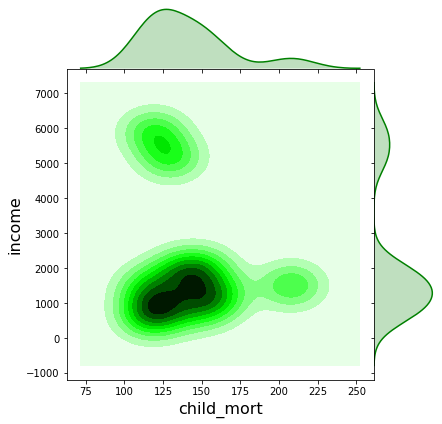

In [16]:
# Plot Top 10 countries having highest child mortality rate and lowest income
df=country_df.sort_values(by=['child_mort','income'], ascending=[False, True]).head(10)
print(df[['country', 'child_mort','income']].to_string(index=False))
ax=sns.jointplot(x='child_mort', y='income', hue='country', data= df, height=6,space=0, color="g", kind="kde")


**Observation:**
As per above shown, the top 10 countries with low income of 600-2,000 have a high child mortality rate of 110-140. Few countries has income 5,000 to 6,000.

                  country  gdpp  life_expec
                  Burundi   231        57.7
                  Liberia   327        60.8
         Congo, Dem. Rep.   334        57.5
                    Niger   348        58.8
             Sierra Leone   399        55.0
               Madagascar   413        60.8
               Mozambique   419        54.5
 Central African Republic   446        47.5
                   Malawi   459        53.1
                  Eritrea   482        61.7


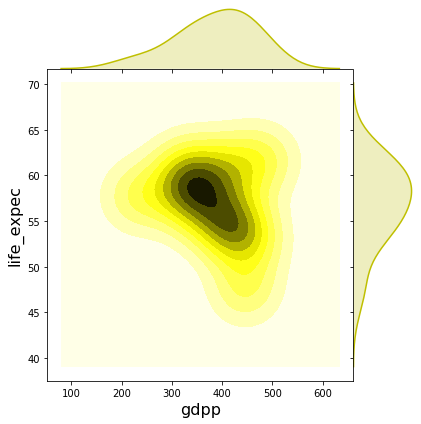

In [17]:
# Plot Top 10 countries having lowest GDP per capita  and lowest Life Expectancy.
df=country_df.sort_values(by=['gdpp','life_expec'], ascending=[True, True]).head(10)
print(df[['country', 'gdpp','life_expec']].to_string(index=False))
ax=sns.jointplot(x='gdpp', y='life_expec', hue='country', data= df, height=6,space=0, color="y", kind="kde")

**Observation:** Top 10 countries with lowe life expectancy rates ranging from 47-62. we can see that the countries with low GDP per capita has low life expectancy.

                  country  income  gdpp
         Congo, Dem. Rep.     609   334
                  Liberia     700   327
                  Burundi     764   231
                    Niger     814   348
 Central African Republic     888   446
               Mozambique     918   419
                   Malawi    1030   459
                   Guinea    1190   648
                     Togo    1210   488
             Sierra Leone    1220   399


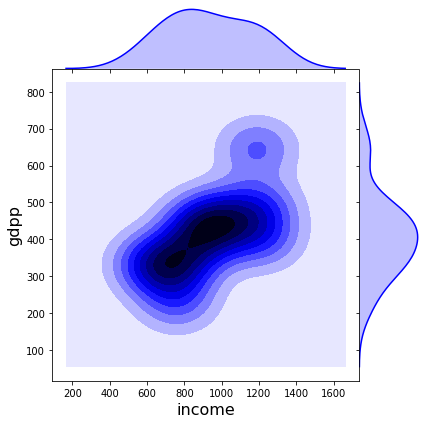

In [18]:
# Plot Top 10 countries having lowest GDP per capita  and lowest capita income.
df=country_df.sort_values(by=['income','gdpp'], ascending=[True, True]).head(10)
print(df[['country', 'income','gdpp']].to_string(index=False))
ax=sns.jointplot(x='income', y='gdpp', hue='country', data= df, height=6,space=0, color="b", kind="kde")

**Observation:** As per shown above top 10 countries with low income ranging between 600-1,300 have a GDP of 300-700. As income increases GDP increases.

                  country  child_mort  gdpp
                    Haiti       208.0   662
             Sierra Leone       160.0   399
                     Chad       150.0   897
 Central African Republic       149.0   446
                     Mali       137.0   708
                  Nigeria       130.0  2330
                    Niger       123.0   348
                   Angola       119.0  3530
         Congo, Dem. Rep.       116.0   334
             Burkina Faso       116.0   575


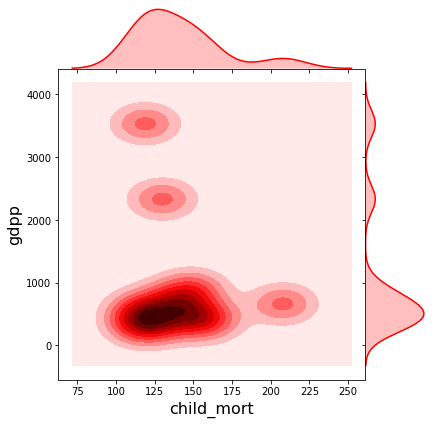

In [19]:
# Plot Top 10 countries having highest child mortality rate and lowest GDP per capita
df=country_df.sort_values(by=['child_mort','gdpp'], ascending=[False, True]).head(10)
print(df[['country', 'child_mort','gdpp']].to_string(index=False))
ax=sns.jointplot(x='child_mort', y='gdpp', hue='country', data= df, height=6,space=0, color="r", kind="kde")

**Observation:**
Using the interpretation of the plot above, we can clearly see that the countries with a GDP lower than 1000 have a child mort high more than 100. The top 10 countries with a child mort rate of 100-200 have a GDP of 300 to 1,000.

On the contrary, the countries with the highest GDP register the lowest child mortality rate.

           country  inflation   gdpp
           Nigeria      104.0   2330
         Venezuela       45.9  13500
          Mongolia       39.2   2650
       Timor-Leste       26.5   3600
 Equatorial Guinea       24.9  17100
             Yemen       23.6   1310
         Sri Lanka       22.8   2810
            Angola       22.4   3530
         Argentina       20.9  10300
  Congo, Dem. Rep.       20.8    334


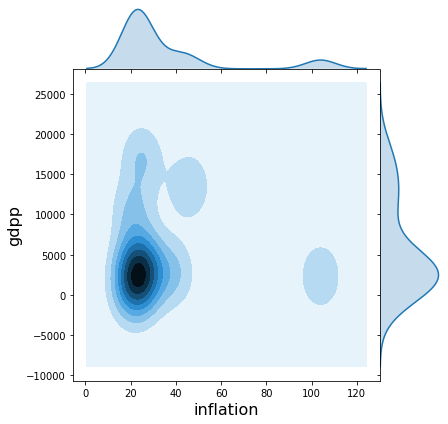

In [20]:
# Plot Top 10 countries having highest inflation rate and lowest GDP per capita
df=country_df.sort_values(by=['inflation','gdpp'], ascending=[False, True]).head(10)
print(df[['country', 'inflation','gdpp']].to_string(index=False))
ax=sns.jointplot(x='inflation', y='gdpp', hue='country', data= df, height=6,space=0, kind="kde")

**Observation:** The top 10 countries with high inflations of 20-50 have a GDP of 300 to 18,000. The Nigeria and Venezuela has highest inflations.

## 3.3 Multivariate analysis

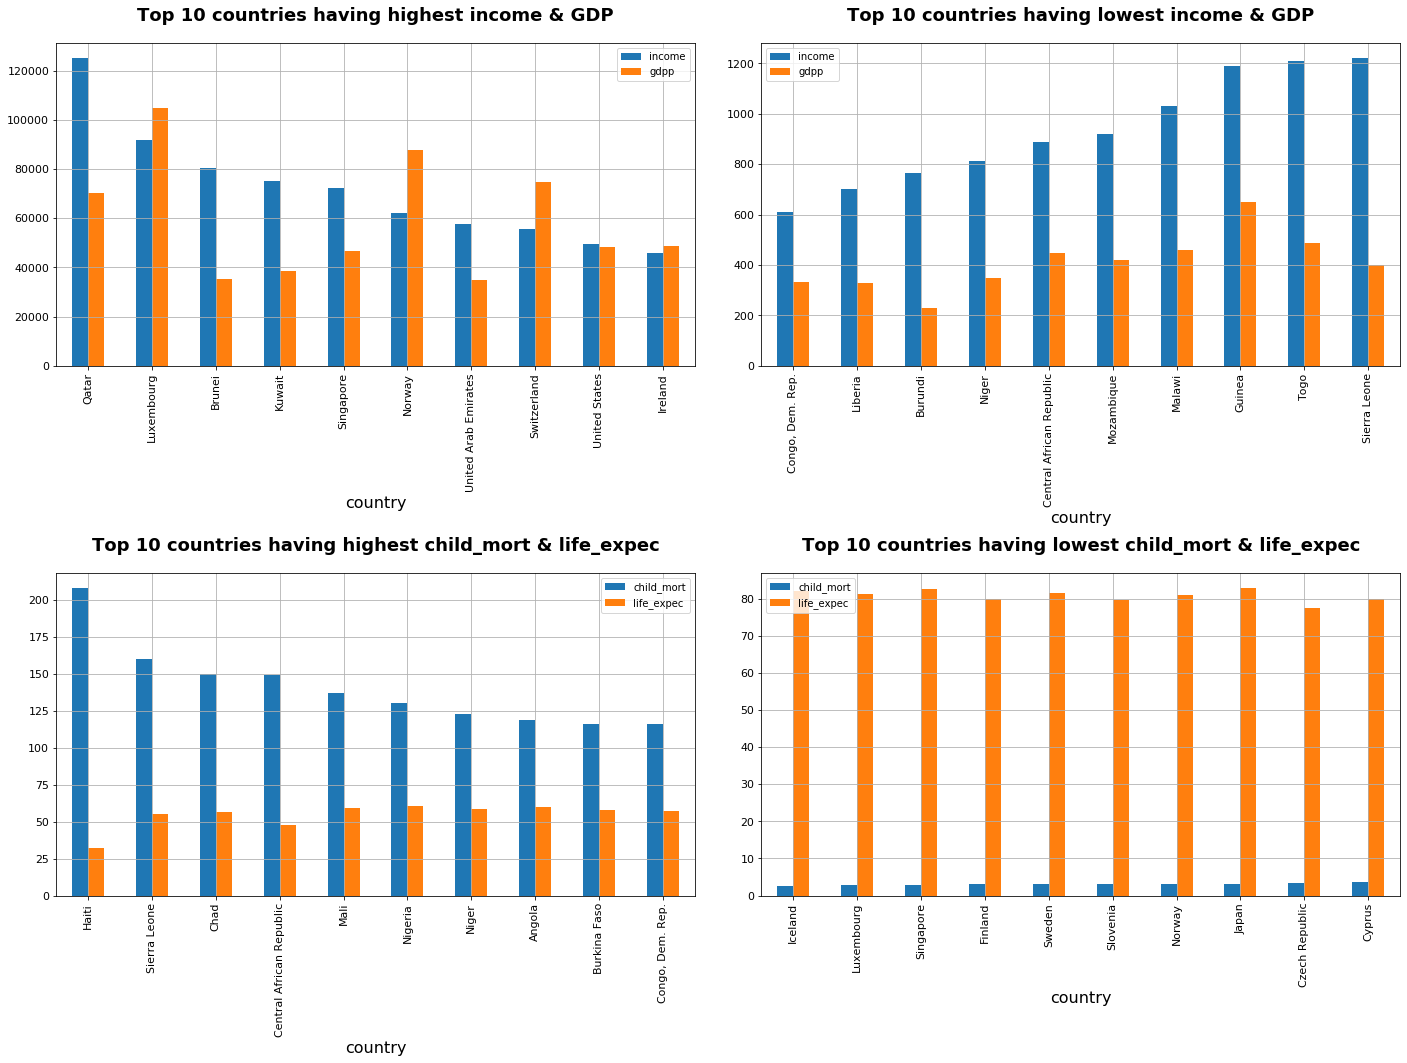

In [21]:
fig = plt.figure(figsize=(20, 20))

ax = fig.add_subplot(3,2,1)
df=country_df.sort_values(by=['income', 'gdpp'], ascending=[False, False]).head(10)
df.plot(x='country', y=['income', 'gdpp'], kind='bar', legend=True,fontsize=11, ax=ax, grid=True)
plt.title('Top 10 countries having highest income & GDP', weight='bold')

ax1 = fig.add_subplot(3,2,2)
df=country_df.sort_values(by=['income', 'gdpp'], ascending=[True, True]).head(10)
df.plot(x='country', y=['income', 'gdpp'], kind='bar', legend=True,fontsize=11, ax=ax1, grid=True)
plt.title('Top 10 countries having lowest income & GDP', weight='bold')

ax2 = fig.add_subplot(3,2,3)
df=country_df.sort_values(by=['child_mort', 'life_expec'], ascending=[False, False]).head(10)
df.plot(x='country', y=['child_mort', 'life_expec'], kind='bar', legend=True,fontsize=11, ax=ax2, grid=True)
plt.title('Top 10 countries having highest child_mort & life_expec', weight='bold')


ax3 = fig.add_subplot(3,2,4)
df=country_df.sort_values(by=['child_mort', 'life_expec'], ascending=[True, True]).head(10)
df.plot(x='country', y=['child_mort', 'life_expec'], kind='bar', legend=True,fontsize=11, ax=ax3, grid=True)
plt.title('Top 10 countries having lowest child_mort & life_expec', weight='bold')

fig.tight_layout()
plt.show()

**Observation:**
1. Qatar, Luxembourg and Brunei have the three highest incomes in that order, while Luxembourg is leading in GDP followed by Norway and Switzerland. In terms of lowest income Burundi, Liberia and Niger are the countries with the three lowest income. And in terms of lowest GDP Congo is leading this category with Liberia and Burundi close behind.   
2. The top three countries with the highest child mort is the following -> Haiti, Sierra Leone and Chad. While the top three countries leading in life expectancy include -> Nigeria, Mali and Niger. Next the countries with the lowest child mort rate include Czech Rep. Slovenia and Cyprus. Countries with the lowest life expectancy includes -> Japan, Singapore and Iceland.

# Step 4: Outlier Treatment

## 4.1 Outlier Analysis on Continuous variables

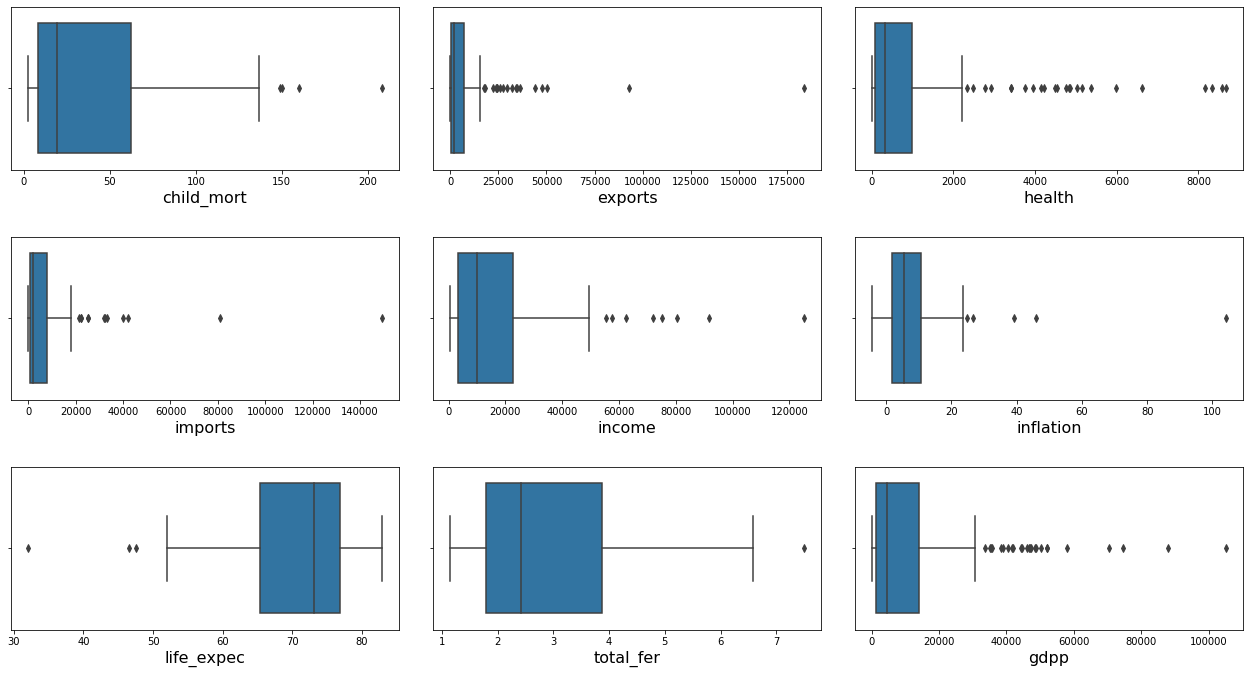

In [22]:
#Box Plot.
plt.figure(figsize = (18, 10))
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(country_df[i[1]])
    plt.tight_layout(pad=3.0)

**Observations:**
1. Child mortality rate has a median of 15 and a range between 0-135. With several outliers beyond this point. 
2. Exports has a median of 1,500 and a range between 0-20,000. With multiple outliers above the upper boundary.
3. Health has a median of 250 and a range between 0-2250. With a couple of outliers above the upper boundary.
4. Imports has a median of 1,000 and a range between 0-180,000. With a few outliers above the upper boundary. 
5. Income has a median of 9,000 and a range between 0-51,000. With several outliers above the upper boundary.
6. Inflation has a median of 4 and a range between -4-22. With a couple of outliers above the upper boundary.
7. Life Expectancy rates have a median of 73 and a range between 52-85. With a few outliers below the lower boundary. 
8. Total Fer has a median of 2.5 and a range between 1.25-6.75. With one single outlier above the upper boundary.
9. GDP has a median of 4,500 and a range between 0-32,000. With multiple outliers above the upper boundary.

Since the data set contains a smaller number of records, hence it is not advisable to drop or impute any such columns as part of outlier treatment. Hence, we recommended the capping the data with soft range.

#### Capping Ranges:
- 1-99  Soft range.
- 5-95  Medium range
- 25-75 Hard range..

## 4.2 Capping Outliers

In [23]:
#Capping Soft range.

def Capping_fn(data, x, flg):
    q1 = data[x].quantile(0.01)
    q4 = data[x].quantile(0.99)
    if flg == 0:
        data[x][data[x]<=q1] = q1
    else:
        data[x][data[x]>=q4] = q4

**Recommendation:**
- Since our objective is to find those countries that are needed to aid, it is recommended not capping the outliers for lower range for all variables (Except child_mort & Inflection).
- For all of the variables, we may cap the upper range outliers and for child_mort & Inflection we may cap for lower range outliers.

In [24]:
col=['child_mort', 'inflation']
for i in enumerate(features):
    if i in col:
        Capping_fn(country_df, i[1], 0)
    else:
        Capping_fn(country_df, i[1], 1)

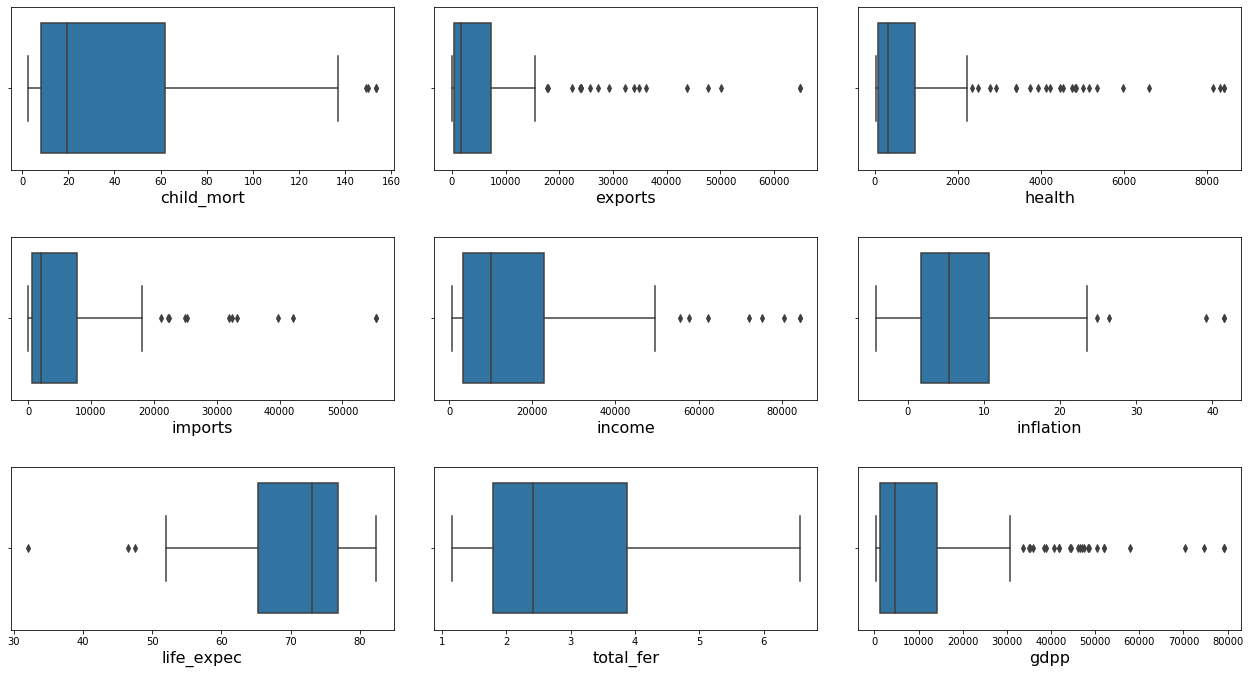

In [25]:
#After capping.
plt.figure(figsize = (18, 10))
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(country_df[i[1]])
    plt.tight_layout(pad=3.0)

**Observation:**
- Performed soft capped the lower range for child_mort & inflation
- Performed soft capped the upper range for rest of variables.

After outlier treatment we need to perform the **clustering tendency test** to confirm that the dataset is viable for performing the clustering.

# Step 5: Clustering

## 5.1 Clustering Tendency Test

### 5.1.1 Perform Hopkins Statistics - Score test

In [26]:
#Import required Libraries.
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

In [27]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [28]:
hscore=0
for i in range(10):
    hscore += hopkins(country_df[features])
    
print('Average of Hopkins Score: ', hscore/10)

Average of Hopkins Score:  0.8969344112561887


**Observation:** Hopkins Score shows more than 85%, hence it is viable to preforming the clustering in this data frame

## 5.2 Scaling

As part of data preparation for Cluster, We need to scale the all numerical and continuous variables since these values are not in proper to perform the cluster hence we need to scaling these variables with standard scaling.

In [29]:
#Import required Libraries.
import sklearn
from sklearn.preprocessing import StandardScaler

In [30]:
# instantiate
scaler = StandardScaler()

# fit_transform
features_scaled = scaler.fit_transform(country_df[features])
features_scaled.shape

(167, 9)

In [31]:
features_scaled_df = pd.DataFrame(features_scaled)
features_scaled_df.columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
features_scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344006,-0.569622,-0.566958,-0.598741,-0.851668,0.265002,-1.619705,1.926396,-0.702259
1,-0.547497,-0.473858,-0.440393,-0.413584,-0.386946,-0.372075,0.648831,-0.865054,-0.498726
2,-0.272510,-0.424000,-0.486271,-0.476100,-0.221053,1.122161,0.671403,-0.034983,-0.477434
3,2.084159,-0.381249,-0.534088,-0.463973,-0.612045,1.932987,-1.179541,2.153997,-0.530950
4,-0.709406,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.705262,-0.543736,-0.032042


## 5.3 K-Means Clustering
#### Finding the Optimal Number of Clusters

### 5.3.1 Silhouette Analysis

In [32]:
#Import Libraries.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

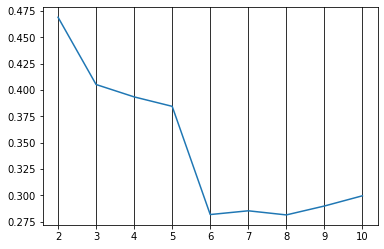

In [33]:
ss = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(features_scaled_df)
    ss.append([k,silhouette_score(features_scaled_df, kmean.labels_)])

temp = pd.DataFrame(ss)
ax=plt.plot(temp[0], temp[1])
plt.grid(color='black', which='major', axis='x', linestyle='solid')

**Observation:**

Silhouette score pick at 3 apart from initial data point K at 2, Hence we can consider 3 clusters for this model

### 5.3.2 Elbow Method

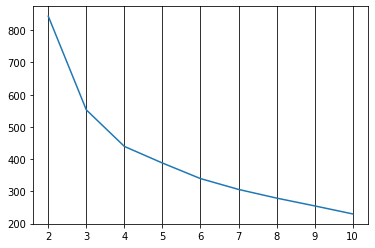

In [34]:
# Elbow curve-ssd
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(features_scaled_df)
    ssd.append([k,kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])
plt.grid(color='black', which='major', axis='x', linestyle='solid')

**Observation:** 

As per elbow curve analysis, it is clearly shown that it has elbow at 3. Hence, we can consider the optimal value for K is 3 for this model.

In [35]:
# Final K-Means clustering K=3.
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=50)
kmeans.fit(features_scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [36]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2], dtype=int32)

In [37]:
# assign the label
country_df['kmean_cluster_labels'] = kmeans.labels_
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmean_cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [38]:
country_df.kmean_cluster_labels.value_counts().sort_index()

0    90
1    29
2    48
Name: kmean_cluster_labels, dtype: int64

### 5.3.3 Plot on K-Means Cluster Labels.

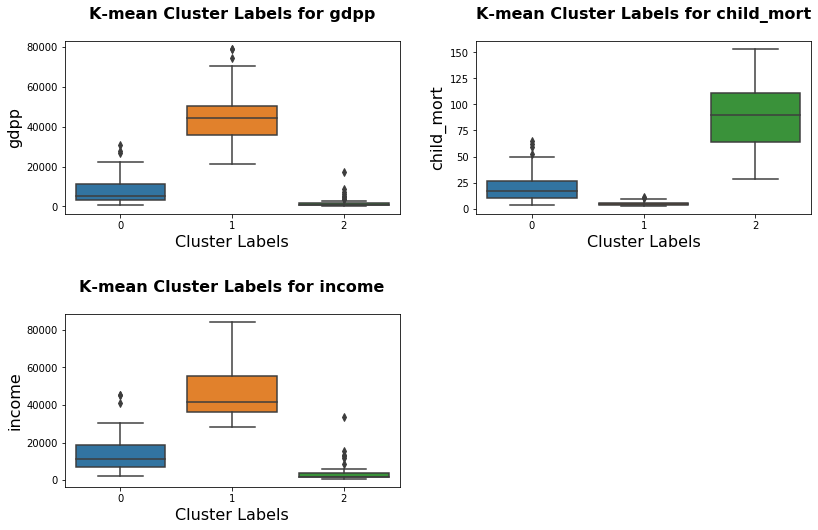

In [39]:
var=['gdpp', 'child_mort', 'income']

index=1
fig = plt.figure(figsize=(12, 8))
plt.rcParams['axes.titlesize'] = 16
for vals in var:
    ax = fig.add_subplot(2, 2, index)
    sns.boxplot(x='kmean_cluster_labels', y=vals, data=country_df)
    plt.xlabel('Cluster Labels')
    plt.title('K-mean Cluster Labels for '+vals, weight='bold')
    plt.tight_layout(pad=3.0)
    index= index+1

**Observation on K-Means clustering:** 

1. In terms of GDP cluster 1 has the highest median, however cluster 1 has the highest range. Cluster 2 has the lowest range and the lowest median with a few outliers above the upper boundary.
2. Cluster 2 has the highest median and the highest range. Followed by cluster 0 and 1. In terms of Child Mortality Rate.
3. Cluster 1 has the highest median and the highest range in terms of income. With cluster 0 and 2 following behind. However, Cluster 0 and 2 have outliers above the upper boundary.

Overall the cluster 2 has the countries has the highest child mortality rate, lowest income and GDP.

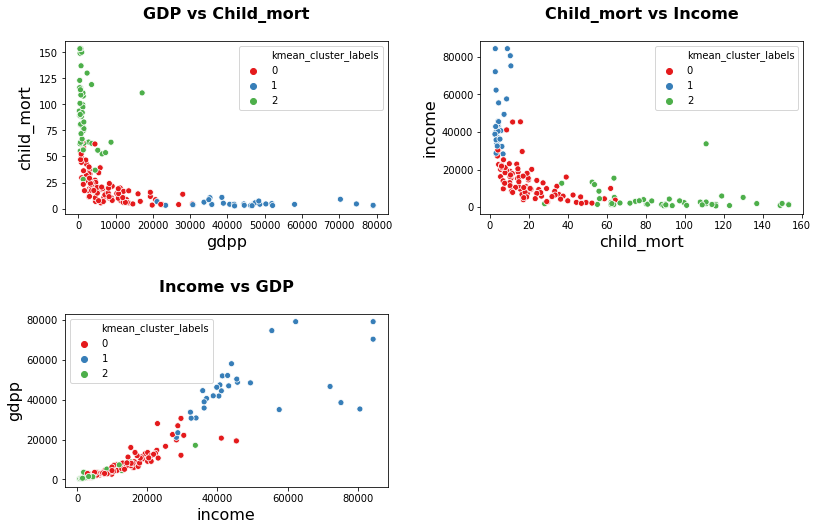

In [40]:
# plot chart for K-mean cluster labels.
plt.figure(figsize = (12, 8))
plt.rcParams['axes.titlesize'] = 16
plt.subplot(2,2,1)
sns.scatterplot(x='gdpp', y='child_mort', hue='kmean_cluster_labels', data=country_df, palette = 'Set1')
plt.title('GDP vs Child_mort', weight='bold')
plt.subplot(2,2,2)
sns.scatterplot(x='child_mort', y='income', hue='kmean_cluster_labels', data=country_df, palette = 'Set1')
plt.title('Child_mort vs Income', weight='bold')
plt.subplot(2,2,3)
sns.scatterplot(x='income', y='gdpp', hue='kmean_cluster_labels', data=country_df, palette = 'Set1')
plt.title('Income vs GDP', weight='bold')
plt.tight_layout(pad=3.0)

**Observation:** 
From the scatter plotting for K-Means:

- GDP vs Child_mort plot:
    - The cluster 0 has moderate GDP and moderate Child mortality rate
    - The cluster 1 has High GDP and Low Child mortality rate
    - The Cluster 2 has low GDP and highest Child mortality rate
- Child_mort vs Income plot:
    - The cluster 0 has moderate Child_mort and moderate Income
    - The cluster 1 has Low Child morality and High Income
    - The Cluster 2 has highest Child mortality rate and low Income
- Income vs GDP plot:
    - The cluster 0 has moderate Income and moderate GDP
    - The cluster 1 has High Income and High GDP
    - The Cluster 2 has low Income and low GDP
    
Overall the cluster 2 has the countries has the highest child mortality rate, lowest income and GDP.

## 5.4 Hierarchical Clustering

In [41]:
#Import Libraries.
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [42]:
features_scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344006,-0.569622,-0.566958,-0.598741,-0.851668,0.265002,-1.619705,1.926396,-0.702259
1,-0.547497,-0.473858,-0.440393,-0.413584,-0.386946,-0.372075,0.648831,-0.865054,-0.498726
2,-0.272510,-0.424000,-0.486271,-0.476100,-0.221053,1.122161,0.671403,-0.034983,-0.477434
3,2.084159,-0.381249,-0.534088,-0.463973,-0.612045,1.932987,-1.179541,2.153997,-0.530950
4,-0.709406,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.705262,-0.543736,-0.032042


### 5.4.1 Single linkage

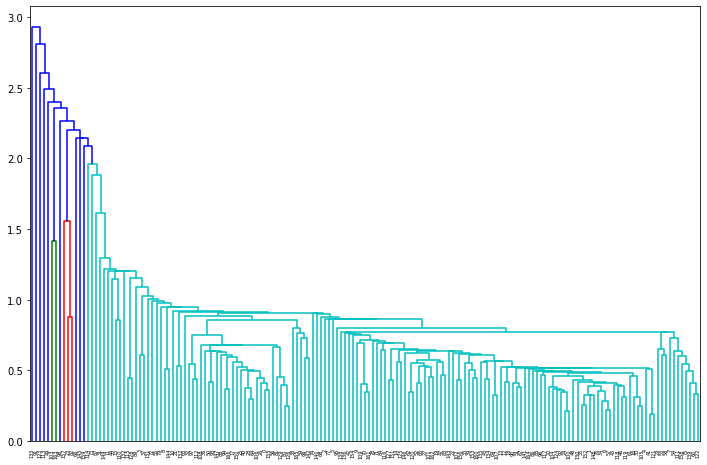

In [43]:
# single linkage
plt.figure(figsize = (12, 8))
mergings = linkage(features_scaled_df, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

**Observation:** Above dendrogram plot shows the single linkage. It was difficult to determine the cluster value.

### 5.4.2 Complete linkage

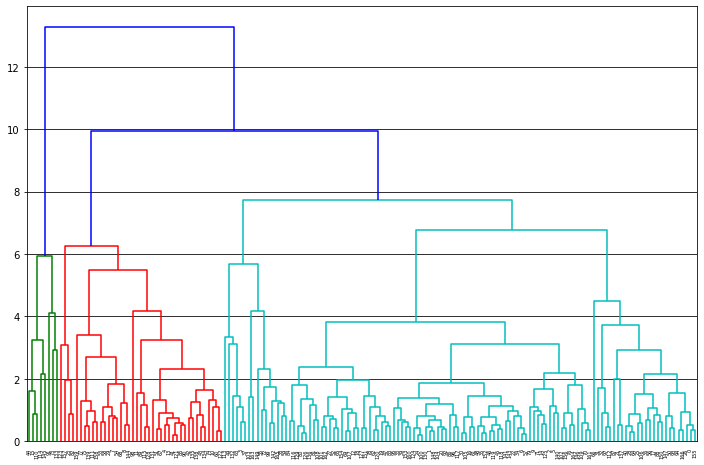

In [44]:
# complete linkage
plt.figure(figsize = (12, 8))
mergings = linkage(features_scaled_df, method="complete", metric='euclidean')
dendrogram(mergings)
plt.grid(color='black', which='major', axis='y', linestyle='solid')
plt.show()

**Observation:** Above dendrogram plot shows the complete linkage. Since we can consider the threshold value of 6 the The number of cluster value will be 6. hence we cut the tree as n_clusers at 6.

In [45]:
# Clusters at 6.
cluster_labels = cut_tree(mergings, n_clusters=6).reshape(-1, )
cluster_labels

array([0, 1, 1, 2, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 1, 4, 1, 0, 1, 1, 1, 0,
       1, 5, 1, 0, 0, 1, 0, 3, 1, 0, 0, 1, 1, 1, 0, 2, 2, 1, 0, 3, 3, 3,
       4, 1, 1, 1, 1, 2, 0, 3, 1, 3, 3, 2, 0, 1, 3, 2, 3, 1, 1, 2, 0, 1,
       0, 3, 3, 1, 1, 1, 2, 4, 3, 3, 1, 3, 1, 1, 1, 1, 5, 1, 1, 3, 1, 0,
       0, 3, 3, 4, 1, 0, 0, 1, 1, 0, 3, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1,
       4, 3, 0, 2, 4, 3, 1, 1, 1, 1, 1, 3, 3, 5, 1, 1, 1, 1, 3, 1, 1, 3,
       2, 4, 3, 3, 1, 0, 3, 3, 1, 1, 2, 1, 3, 4, 1, 0, 1, 2, 0, 1, 1, 1,
       1, 0, 1, 5, 3, 3, 1, 1, 1, 2, 1, 2, 0])

In [46]:
# Assign cluster labels
country_df['hier_cluster_labels'] = cluster_labels
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmean_cluster_labels,hier_cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,3


In [47]:
country_df.hier_cluster_labels.value_counts().sort_index()

0    26
1    76
2    16
3    37
4     8
5     4
Name: hier_cluster_labels, dtype: int64

### 5.4.3 Plot on Hierarchical Cluster Labels.

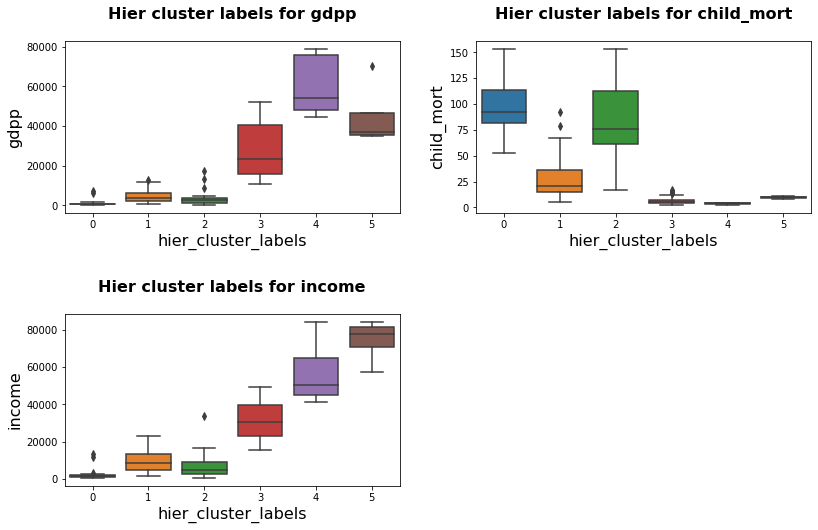

In [48]:
index=1
fig = plt.figure(figsize=(12, 8))
plt.rcParams['axes.titlesize'] = 16
for vals in var:
    ax = fig.add_subplot(2, 2, index)
    sns.boxplot(x='hier_cluster_labels', y=vals, data=country_df)
    plt.title('Hier cluster labels for '+vals, weight='bold')
    plt.tight_layout(pad=3.0)
    index= index+1

**Observation from Hierarchical Clustering:** 

1. In terms of GDP cluster 4 has the highest median, however cluster 3 has the highest range. Cluster 0 has the lowest range and the lowest median with a few outliers above the upper boundary.
2. Cluster 0 has the highest median and the highest range. Followed by cluster 2 and 1. In terms of Child Mortality Rate.
3. Cluster 5 has the highest median and the highest range in terms of income. With cluster 4 and 3 following behind. The Cluster 0 lowest income for person.

Overall the cluster 0 has the countries has the highest child mortality rate, lowest income and GDP.

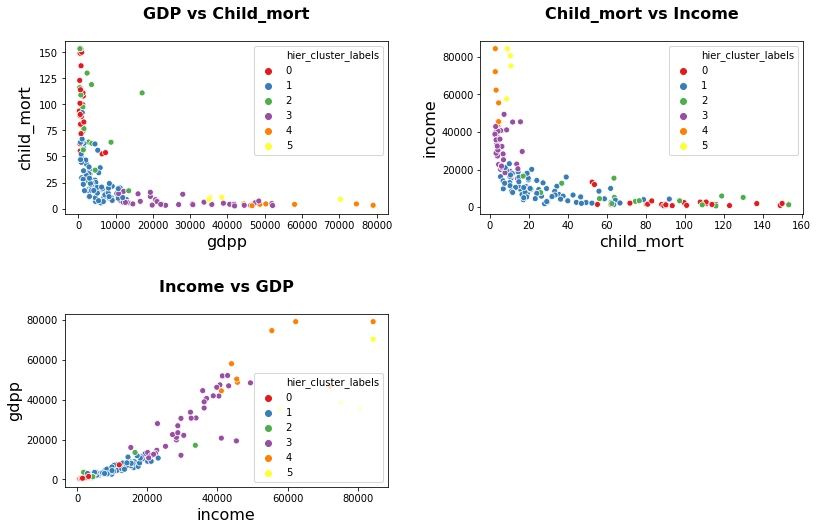

In [49]:
# plot chart for hier_cluster_labels.
plt.figure(figsize = (12, 8))
plt.rcParams['axes.titlesize'] = 16
plt.subplot(2,2,1)
sns.scatterplot(x='gdpp', y='child_mort', hue='hier_cluster_labels', data=country_df, palette = 'Set1')
plt.title('GDP vs Child_mort', weight='bold')
plt.subplot(2,2,2)
sns.scatterplot(x='child_mort', y='income', hue='hier_cluster_labels', data=country_df, palette = 'Set1')
plt.title('Child_mort vs Income', weight='bold')
plt.subplot(2,2,3)
sns.scatterplot(x='income', y='gdpp', hue='hier_cluster_labels', data=country_df, palette = 'Set1')
plt.title('Income vs GDP', weight='bold')
plt.tight_layout(pad=3.0)

**Observation:** 
From the scatter plotting for Hierarchical Cluster:

- GDP vs Child_mort plot:
    - The cluster 0 has high Child mortality rate and low GDP, followed by cluster 1 & 2.
    - The cluster 3 & 5 has moderate GDP and low Child mortality rate
    - The Cluster 4 has High GDP and low mortality rate
- Child_mort vs Income plot:
    - The cluster 0 has high Child_mort and low Income, followed by cluster 1 & 2
    - The cluster 3 & 4 has low Child morality and moderate Income
    - The Cluster 5 has low Child mortality rate and high Income
- Income vs GDP plot:
    - The cluster 0 has low Income and low GDP, followed by cluster 1 & 2
    - The cluster 4 & 5 has high Income and high GDP
    
Overall the cluster 0 has the countries has the highest child mortality rate, lowest income and GDP.

# Step 6: Cluster Profiling

### 6.1 Cluster profiling with K-Mean clustering labels

Considering the **K-Mean clustering labels** for cluster profiling and also analysing the clusters by comparing the three variables: gdpp, child_mort & income.

In [50]:
cl_country_df = country_df[country_df.columns[1:]].groupby('kmean_cluster_labels').mean().reset_index()
cl_country_df.head()

,kmean_cluster_labels,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,hier_cluster_labels
0,0,20.547778,3477.015539,528.894338,3588.133568,13804.333333,7.110944,73.393333,2.242444,7808.577778,1.466667
1,1,4.982759,25405.359310,4239.330028,21316.695862,47784.413793,2.876690,80.453103,1.754138,46068.137931,3.551724
2,2,90.335417,879.063521,114.821765,827.028771,3897.354167,10.608604,59.239583,4.972233,1909.208333,0.750000


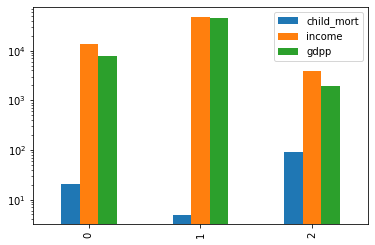

In [51]:
cl_country_df[['child_mort', 'income', 'gdpp']].plot(kind='bar')
plt.yscale('log')

**Observation:** As per above plot, it is clearly shown that the **cluster: 2** has the countries having high child modality, low income and low GDP.

In [52]:
# Low income, Low GDP and High Child_mort
# Filter the data for the cluster 2.

country_df[['country', 'gdpp', 'child_mort', 'income']][country_df['kmean_cluster_labels'] == 2]

,country,gdpp,child_mort,income
0,Afghanistan,553.0,90.2,1610.0
3,Angola,3530.0,119.0,5900.0
17,Benin,758.0,111.0,1820.0
21,Botswana,6350.0,52.5,13300.0
25,Burkina Faso,575.0,116.0,1430.0
26,Burundi,231.0,93.6,764.0
28,Cameroon,1310.0,108.0,2660.0
31,Central African Republic,446.0,149.0,888.0
32,Chad,897.0,150.0,1930.0
36,Comoros,769.0,88.2,1410.0


In [53]:
#Low GDP, High Child mortality rate and Low income in k-means clustering is 2.

aid_df = country_df[country_df.kmean_cluster_labels ==2].sort_values(by=['gdpp', 'child_mort', 'income'], 
                                                                  ascending = [True, False, True]).head(5)
aid_df[['country', 'gdpp', 'child_mort', 'income']]

,country,gdpp,child_mort,income
26,Burundi,231.0,93.6,764.0
88,Liberia,327.0,89.3,700.0
37,"Congo, Dem. Rep.",334.0,116.0,609.0
112,Niger,348.0,123.0,814.0
132,Sierra Leone,399.0,153.4,1220.0


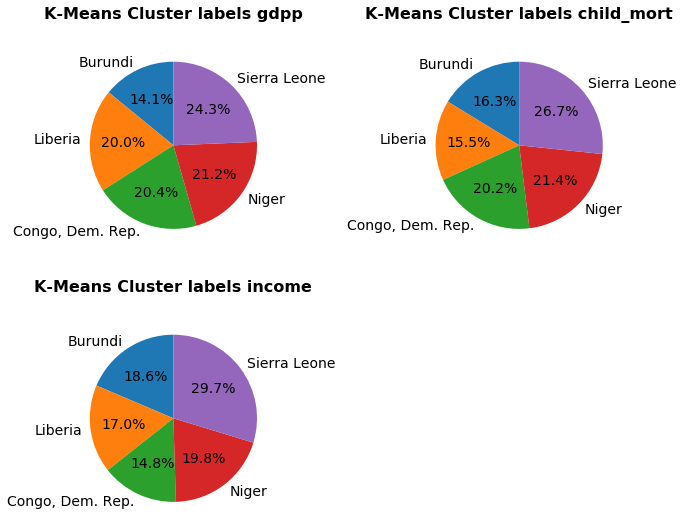

In [54]:
var=['gdpp', 'child_mort', 'income']

index=1
fig = plt.figure(figsize=(10, 8))
plt.rcParams['axes.titlesize'] = 16
for vals in var:
    ax = fig.add_subplot(2, 2, index)
    aid_df.plot(kind='pie', y = vals, ax=ax, autopct='%1.1f%%', 
                 startangle=90, shadow=False,labels=aid_df['country'],legend = False, fontsize=14)
    plt.ylabel('')
    plt.title('K-Means Cluster labels '+vals, weight='bold')
    plt.tight_layout(pad=3.0)
    index= index+1

**Observation:** The above chart from K-Means cluster label shows the Top five countries that are in the direst need of assistance. As the have low GDP as shown in the first chat. Next, they have a high child mortality rate as shown in the 2nd graph. Lastly, they have a low income as shown in the 3rd graph

### 6.2 Cluster profiling with Hierarchical Cluster Labels.

Considering the **Hierarchical clustering labels** for cluster profiling and also analysing the clusters by comparing the three variables: gdpp, child_mort & income.

In [55]:
hier_country_df = country_df[country_df.columns[1:]].groupby('hier_cluster_labels').mean().reset_index()
hier_country_df.head()

,hier_cluster_labels,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmean_cluster_labels
0,0,98.273077,347.929615,84.109285,474.800154,2449.769231,6.488269,56.315385,5.120662,1143.500000,2.000000
1,1,28.268421,1711.801283,298.055301,1975.836620,9337.105263,7.010908,71.542105,2.527632,4543.447368,0.210526
2,2,82.112500,2116.142500,204.098800,1511.388438,7584.312500,23.916000,63.712500,4.876250,4086.312500,1.750000
3,3,6.570270,11801.059459,2562.641092,11498.510811,31681.081081,2.391703,78.445135,1.791622,27840.540541,0.459459
4,4,3.825000,45222.215000,6070.207550,38512.335000,56321.750000,1.571125,80.933750,1.727500,60097.000000,1.000000


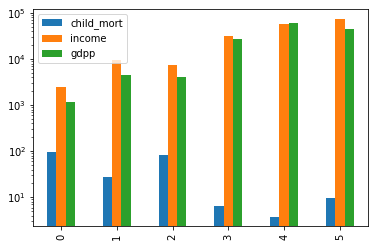

In [56]:
hier_country_df[['child_mort', 'income', 'gdpp']].plot(kind='bar')
plt.yscale('log')

**Observation:** As per above plot, it is clearly shown that the **cluster: 0** has the countries having high child modality, low income and low GDP.

In [57]:
#Low GDP, High Child mortality rate and Low income for Hierarchial clustering is 0.
hier_aid_df = country_df[country_df.hier_cluster_labels ==0].sort_values(by=['gdpp', 'child_mort', 'income'], 
                                                                  ascending = [True, False, True]).head(5)
hier_aid_df[['country', 'gdpp', 'child_mort', 'income']]

,country,gdpp,child_mort,income
26,Burundi,231.0,93.6,764.0
88,Liberia,327.0,89.3,700.0
112,Niger,348.0,123.0,814.0
93,Madagascar,413.0,62.2,1390.0
106,Mozambique,419.0,101.0,918.0


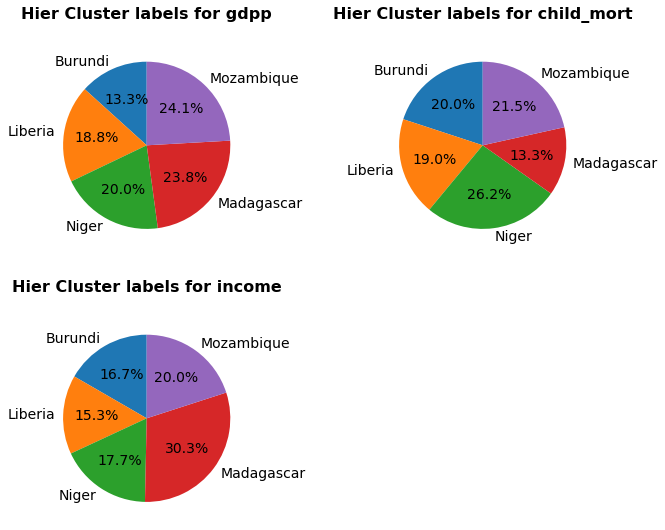

In [58]:
var=['gdpp', 'child_mort', 'income']

index=1
fig = plt.figure(figsize=(10, 8))
plt.rcParams['axes.titlesize'] = 16
for vals in var:
    ax = fig.add_subplot(2, 2, index)
    hier_aid_df.plot(kind='pie', y = vals, ax=ax, autopct='%1.1f%%', 
                 startangle=90, shadow=False,labels=hier_aid_df['country'],legend = False, fontsize=14)
    plt.ylabel('')
    plt.title('Hier Cluster labels for '+vals, weight='bold')
    plt.tight_layout(pad=3.0)
    index= index+1

**Observation:** The above chart from hierarchal cluster label shows the Top five countries that are in the direst need of assistance. As the have low GDP as shown in the first chat. Next, they have a high child mortality rate as shown in the 2nd graph. Lastly, they have a low income as shown in the 3rd graph

# Step 7: Final Analysis and Conclusion

Overall, we have a promising cluster with optimal K at 3 in the **K-Means cluster** algorithm. After performing the soft range capping outlier treatment, we produced an excellent Hopkin score (more than 85%) in the Hopkin score test as part of the cluster tendency test. Performed the Standard scaling to scale the variables. Also, we have performed the K-Means clustering algorithm and performed the Silhouette Analysis and Elbow method and it also produced optimal value cluster K is 3. Also, I have performed the Hierarchical clustering algorithm approach and performed the Single and Complete linkages analyzed the dendrogram for each linkage and preformed the cut tree in Complete linkage at the number of clusters 6.

We have also performed the cluster profiling for GDP, child mortality, and income variables for both clustering labels (K-Means and Hierarchical). After performing the visual verification of both plot and noticed that the K-Means clustering providing optimal results as compare with Hierarchical clustering. Hence it is highly recommended to use the K-Means clustering labels for choosing the countries with the direst need of aid.

In conclusion; in **K-Means Cluster** the cluster is optimal at 3. The cluster labels are 0, 1, 2. The countries present in cluster 2 have low GDP, high mortality rates, and low income. Hence the top 5 countries who are in the direst need of aid are:
- Burundi
- Liberia
- Congo, Dem. Rep.
- Niger
- Sierra Leone

**The evidence from K-Means clustering:**
- Hopkins Statistics - Score: > 85%
- Silhouette Analysis: Optimum source at 3 apart from the initial source 2, hence we consider the Optimal score is 3 for this Data frame.
- Elbow-curve/SSD Analysis: As per the elbow curve, it has elbow K at 3.


**Optional:**
1. Since the few outliers present the dataset, which may impact the clustering. Hence, it is advisable to impute the outliers before proceeding with Clustering.